In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import sys
sys.path.append("..") # Adds higher directory to python modules path.
sys.path.append("/Users/timothyguo/Desktop/Haeffner Group/Trap Design Testing/DC_Confinement/trap_sim_tools_python_trapSims_HOA/v2")
import expansion as ep
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import time
%matplotlib inline
import trap_util as tu
from trap_util import trap
from trap_util import quarter_trap
from trap_util import half_trap
from trap_util_3D import trap_3D
import mysql.connector
import matplotlib.colors as colors
# physical parameters
q = -1.60217662e-19 # coulombs
m = 9.10938356e-31 #kg (electron)
#m = 6.6359437706294e-26 #(calcium)
kB = 1.38064852e-23 # J/K
f = 1.5e9 # Electrode frequency, in Hertz

In [17]:
x_max, x_min = 250.0e-6, -250.0e-6
y_max, y_min = 250.0e-6, -250.0e-6
z_max, z_min = 250.0e-6, -250.0e-6
Nx, Ny, Nz = 10, 10, 10
dx, dy, dz = (x_max-x_min)/Nx, (y_max-y_min)/Ny, (z_max-z_min)/Nz 

In [76]:
x = np.linspace(x_min, x_max, Nx+1)
y = np.linspace(y_min, y_max, Ny+1)
z = np.linspace(z_min, z_max, Nz+1)
Ex = -m * (2*np.pi*100.0e6)**2 * x / q + 1.0e-5 * np.random.rand()
Ey = -m * (2*np.pi*100.0e6)**2 * y / q + 1.0e-5 * np.random.rand()
Ez = -m * (2*np.pi*100.0e6)**2 * z / q + 1.0e-5 * np.random.rand()
df = pd.DataFrame(columns=['x', 'y', 'z', 'Ex', 'Ey', 'Ez'])
for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            n = i*len(y)*len(z) + j*len(z) + k
            df.loc[n] = [x[i], y[j], z[k], Ex[i], Ey[j], Ez[k]]

In [77]:
trap = trap_3D(df, x_max, x_min, y_max, y_min, z_max, z_min, Nx, Ny, Nz, dx, dy, dz, f=0, q=q, m=m)

In [44]:
trap.get_row_index(10.0e-6, 0, 0)

665

In [46]:
df.loc[665]

x     0.000000
y     0.000000
z     0.000000
Ex    0.000005
Ey    0.000004
Ez    0.000005
Name: 665, dtype: float64

In [78]:
dt = 1.0e-11
t_max = 50.0e-9
T = 300.0
r = 100.0e-6
theta_r = 0
phi_r = np.pi/6
v = np.sqrt(3*kB*T/m)
theta_v = 0
phi_v = 0
ts, xs, ys, zs = trap.traj(r, theta_r, phi_r, v, theta_v, phi_v, dt, t_max)

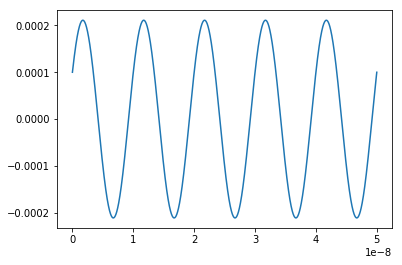

In [79]:
# position vs time
#plt.plot(ts, xs)
#plt.plot(ts, ys)
plt.plot(ts, zs)

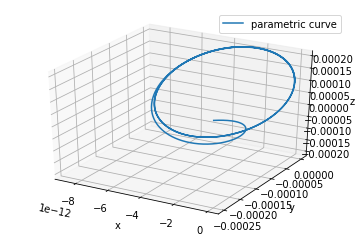

In [65]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs, ys, zs, label='parametric curve')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()